In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train,y_train), (X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

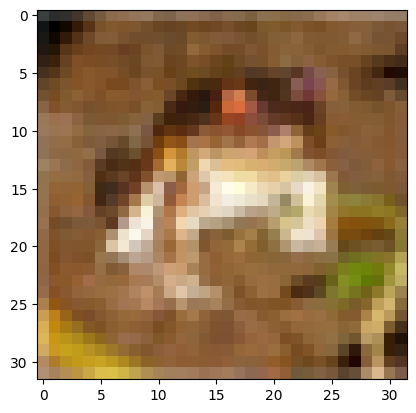

In [ ]:
plt.imshow(X_train[0])

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_train.shape

(50000,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])


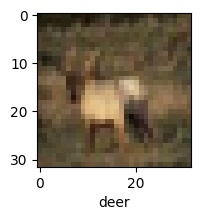

In [ ]:
plot_sample(X_train,y_train,3)

Normilizing Data

In [ ]:
X_train = X_train/255.0
y_train = y_train/255.0

Build simple artificial neural network for image classification

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10,activation = 'softmax')
])

ann.compile(optimizer='SGD',
            loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']
            )
ann.fit(X_train,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 86ms/step - accuracy: 0.1011 - loss: 0.0159
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 80ms/step - accuracy: 0.0996 - loss: 3.5693e-04
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 138s 77ms/step - accuracy: 0.0996 - loss: 2.7607e-04
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 148s 81ms/step - accuracy: 0.1005 - loss: 1.4828e-04
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 78ms/step - accuracy: 0.1002 - loss: 1.1884e-04


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.10      1.00      0.18      1000
           1       0.00      0.00      0.00      1000
           2       0.00      0.00      0.00      1000
           3       0.00      0.00      0.00      1000
           4       0.00      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.00      0.00      0.00      1000
           7       0.00      0.00      0.00      1000
           8       0.00      0.00      0.00      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.10     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.10      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size = (3,3),activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 190s 120ms/step - accuracy: 0.1004 - loss: 0.0128
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 203s 120ms/step - accuracy: 0.1002 - loss: 0.0000e+00
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 205s 122ms/step - accuracy: 0.0984 - loss: 0.0000e+00
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 196s 119ms/step - accuracy: 0.0983 - loss: 0.0000e+00
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 186s 119ms/step - accuracy: 0.0988 - loss: 0.0000e+00
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 208s 123ms/step - accuracy: 0.1001 - loss: 0.0000e+00
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 187s 120ms/step - accuracy: 0.1002 - loss: 0.0000e+00
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 225s 135ms/step - accuracy: 0.0994 - loss: 0.0000e+00
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 200s 128ms/step - accuracy: 0.1009 - loss: 0.0000e+00
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 191s 121ms/step - accuracy: 0.0998 - loss: 0.0000e+00
